In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
img = cv2.imread("input.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

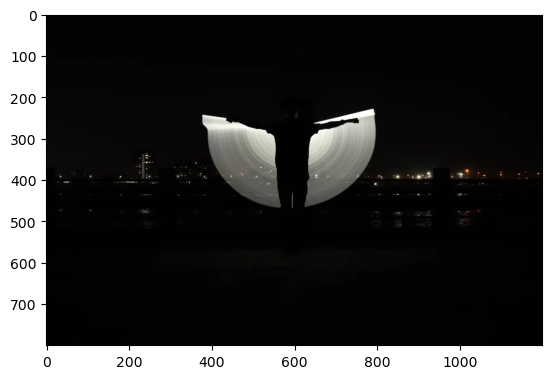

In [3]:
plt.imshow(img);

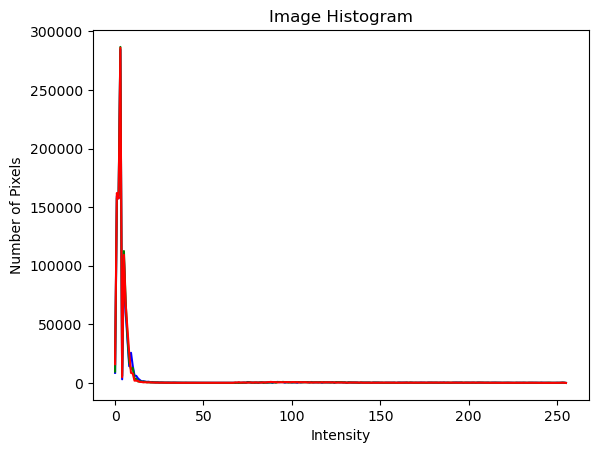

In [4]:
color = ("b", "g", "r")
for i, col in enumerate(color):
    hist = cv2.calcHist([img], [i], mask = None, histSize = [256], ranges = [0,255])
    plt.plot(hist, color = col)
    plt.xlabel("Intensity")
    plt.ylabel("Number of Pixels")
    plt.title("Image Histogram")

In [5]:
# Traditional Histogram Equalization 

In [6]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

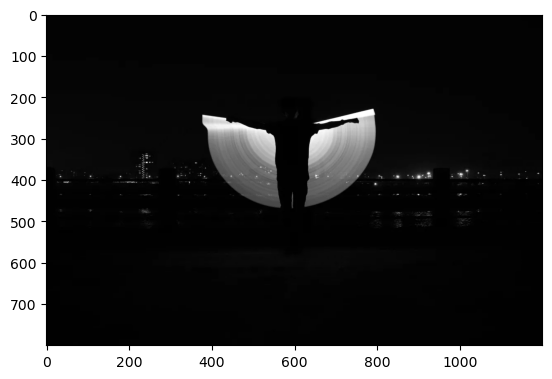

In [7]:
plt.imshow(img_gray, "gray")

In [8]:
img.shape

(800, 1200, 3)

In [9]:
img_gray.shape

(800, 1200)

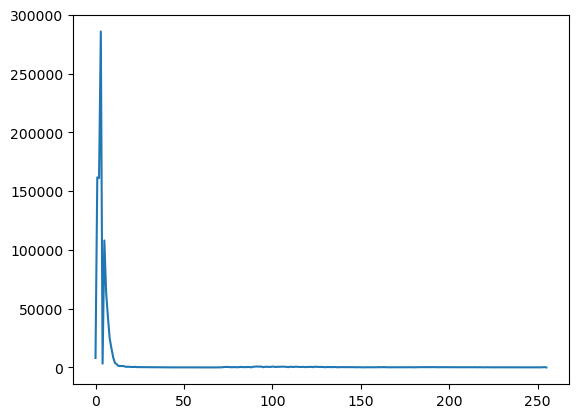

In [10]:
hist = cv2.calcHist([img_gray], [0], None, [256], [0,255])
plt.plot(hist)

In [11]:
equ_img = cv2.equalizeHist(img_gray)

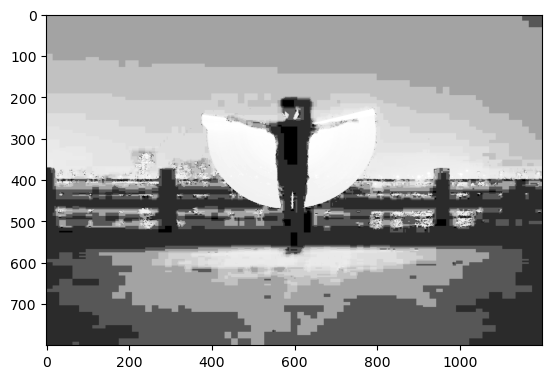

In [12]:
plt.imshow(equ_img, "gray");

Text(0, 0.5, 'Number of Pixels')

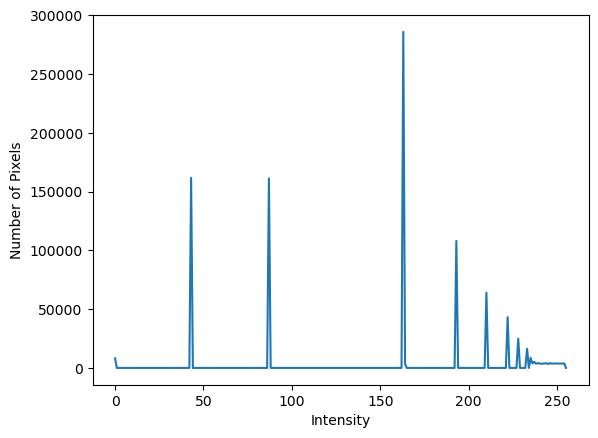

In [13]:
equ_hist = cv2.calcHist([equ_img], [0], None, [256], [0,255])
plt.plot(equ_hist)
plt.xlabel("Intensity")
plt.ylabel("Number of Pixels")

## CLAHE Yöntemi ile Histogram Eşitleme 

In [14]:
clahe = cv2.createCLAHE(clipLimit = 5, tileGridSize = (12,12))

In [15]:
clahe_img = clahe.apply(img_gray)

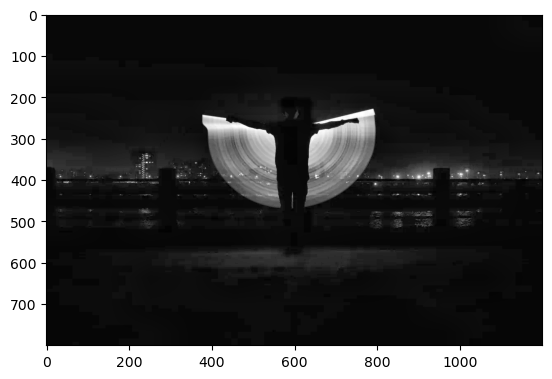

In [16]:
plt.imshow(clahe_img, "gray")

Text(0.5, 1.0, 'Histogram of Normal Image')

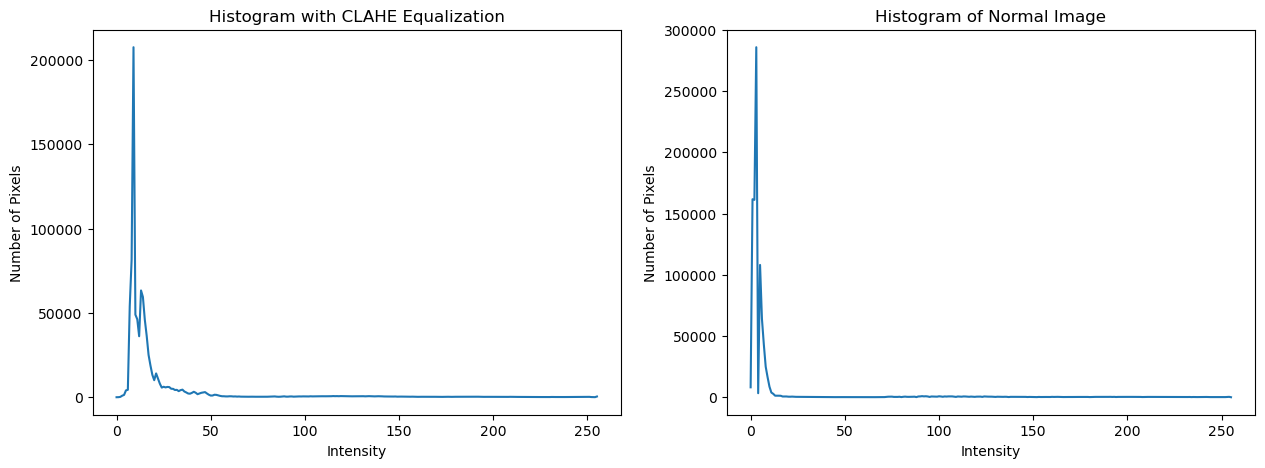

In [17]:
clahe_hist = cv2.calcHist([clahe_img], [0], None, [256], [0,256])
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(clahe_hist)
plt.xlabel("Intensity")
plt.ylabel("Number of Pixels")
plt.title("Histogram with CLAHE Equalization")
plt.subplot(122)
plt.plot(hist)
plt.xlabel("Intensity")
plt.ylabel("Number of Pixels")
plt.title("Histogram of Normal Image")

Text(0.5, 1.0, 'CLAHE Image')

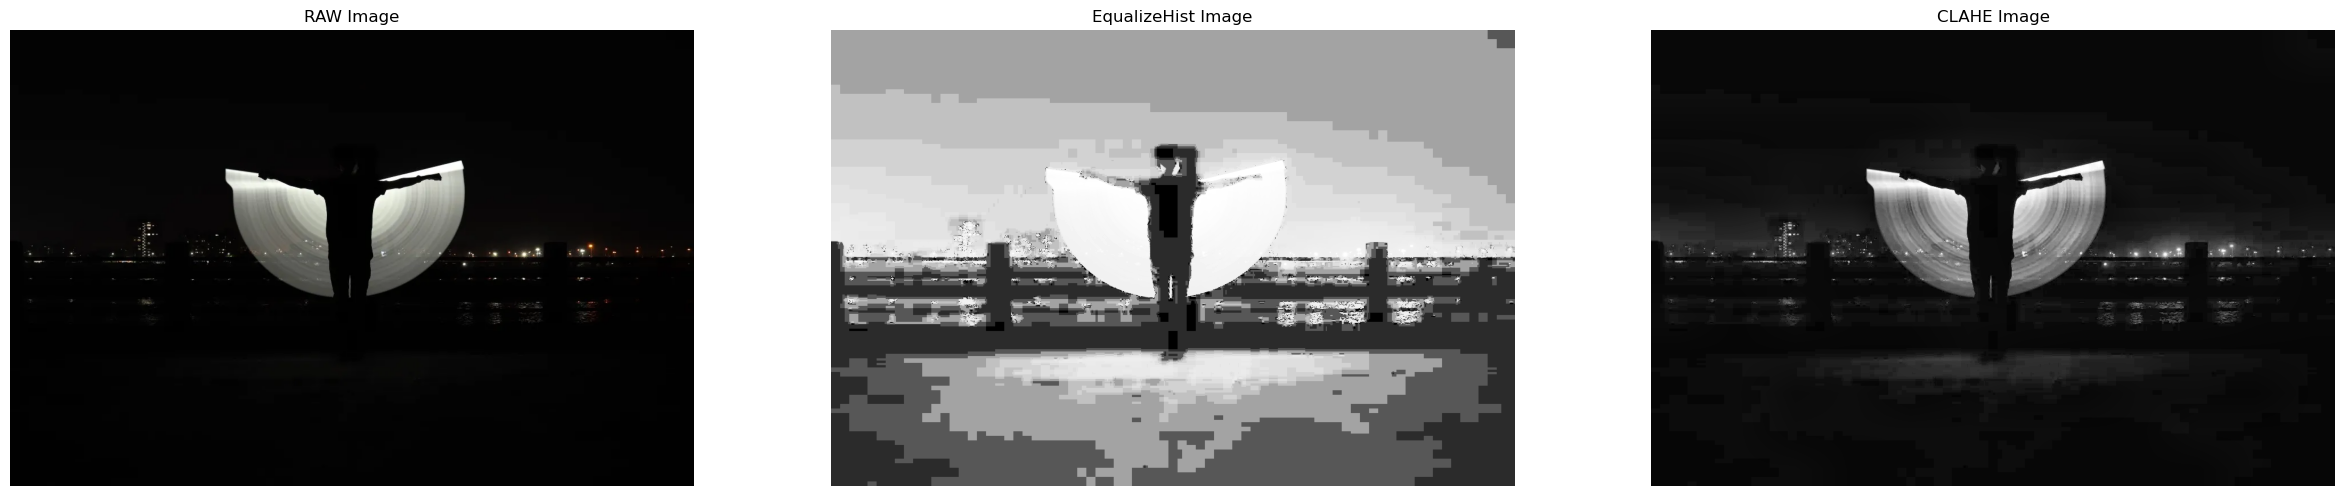

In [18]:
plt.figure(figsize=(30,25))
plt.subplot(131)
plt.imshow(img)
plt.axis("off")
plt.title("RAW Image")
plt.subplot(132)
plt.imshow(equ_img, cmap = "gray")
plt.axis("off")
plt.title("EqualizeHist Image")
plt.subplot(133)
plt.imshow(clahe_img, cmap= "gray")
plt.axis("off")
plt.title("CLAHE Image")

## HSV Renk Uzayı ile Histogram İşlemleri 

### EqualizeHist Yöntemi İle 

In [20]:
img = cv2.imread("gorilla.jpg")
hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

In [21]:
h, s, v = cv2.split(hsv_img)

In [22]:
# Renklerde bozulma olmaması için sadece v(value) yani parlaklık kanalına eşitleme uygulayacağiz

In [23]:
equ_hsv_img = cv2.equalizeHist(v)

In [24]:
hsv_equalized = cv2.merge((h,s,equ_hsv_img))

In [25]:
equ_img = cv2.cvtColor(hsv_equalized, cv2.COLOR_HSV2RGB)

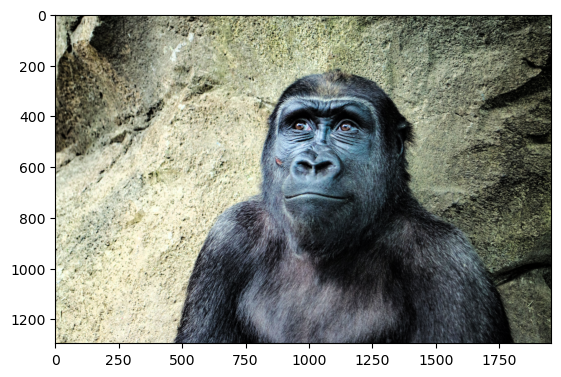

In [26]:
plt.imshow(equ_img)

### CLAHE Yöntemi İle 

In [27]:
clahe = cv2.createCLAHE(clipLimit = 2, tileGridSize = (10,10))

In [28]:
v_clahe = clahe.apply(v)

In [29]:
hsv_clahe = cv2.merge((h,s,v_clahe))

In [30]:
clahe_img = cv2.cvtColor(hsv_clahe, cv2.COLOR_HSV2RGB)

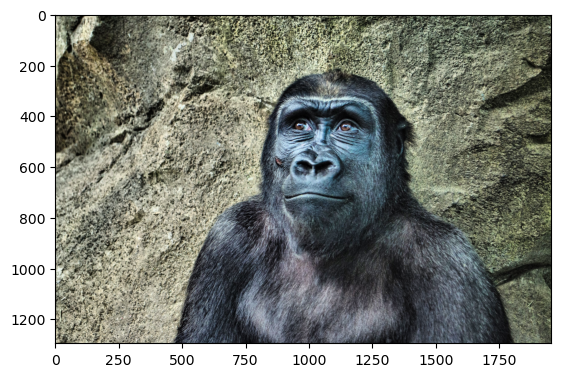

In [31]:
plt.imshow(clahe_img)